# 逻辑回归中添加多项式特征

In [1]:
import matplotlib.pyplot as plt
import numpy as np

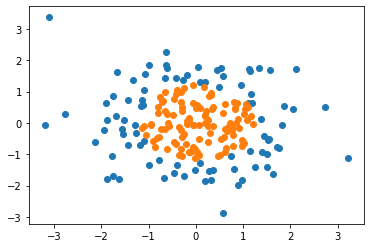

In [2]:
np.random.seed(666)
x = np.random.normal(0, 1, size = (200, 2))
y = np.array(x[:, 0]**2 + x[:, 1]**2 < 1.5, dtype=int)

plt.scatter(x[y==0, 0], x[y==0, 1])
plt.scatter(x[y==1, 0], x[y==1, 1])
plt.show()

## 使用逻辑回归

In [8]:
# sigmoid函数
def sigmoid(t):
    return 1. / (1. + np.exp(-t))

# cost函数
def J(x_b, y, theta):
    y_heat = sigmoid(x_b.dot(theta))
    return -np.sum(y * np.log(y_heat) + (1 - y) * np.log(1 - y_heat)) / len(y)

# 梯度求解
def delta_J(x_b, y, theta):
    return x_b.T.dot(sigmoid(x_b.dot(theta)) - y) / len(y)

# 梯度下降法函数
def gradient_descent(x_b, y, theta_init, eta, iter_times):
    x_b = np.hstack([np.ones(shape=(len(x_b), 1)), x_b]) 
    theta = theta_init
    loss_his = []
    
    while iter_times:
        gradient = delta_J(x_b, y, theta)
        theta -= eta * gradient
        loss = J(x_b, y, theta)
        
        loss_his.append(loss)
        iter_times -= 1
    
    return theta, loss_his

# 预测函数
def predict(x, theta):
    x_b = np.hstack([np.ones(shape=(len(x),1)), x])
    predict_prob = sigmoid(x_b.dot(theta))
    return np.array(predict_prob >= 0.5, dtype=int)

def score(y_predict, y_real):
    from sklearn.metrics import accuracy_score
    return accuracy_score(y_real, y_predict)

In [9]:
theta_final, loss_his = gradient_descent(x, y, np.zeros(x.shape[1]+1), 0.01, 1000)
y_predict = predict(x, theta_final)
score(y_predict, y)

0.615

## 边界绘制函数

In [12]:
def plot_decision_boundary(model, axis):
    x0, x1 = np.meshgrid(
        np.linspace(axis[0], axis[1], int((axis[1] - axis[0]) * 100)),
        np.linspace(axis[2], axis[3], int((axis[3] - axis[2]) * 100))
    )
    
    X_new = np.c_[x0.ravel(), x1.ravel()]
    
    y_predict =predict(X_new, theta_final)
    zz = y_predict.reshape(x0.shape)
    
    from matplotlib.colors import ListedColormap
    custom_cmap = ListedColormap(["#EF9A9A", "#FFF59D", "#90CAF9"])
    
    plt.contourf(x0, x1, zz, cmap = custom_cmap, linewidth = 5)

D:\Anaconda\Anaconda3\envs\Tensorflow-gpu\lib\site-packages\ipykernel_launcher.py:15: UserWarning: The following kwargs were not used by contour: 'linewidth'
  from ipykernel import kernelapp as app


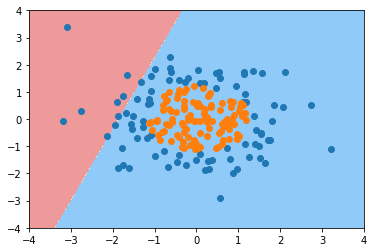

In [13]:
plot_decision_boundary(predict, axis=[-4,4,-4,4])
plt.scatter(x[y==0, 0], x[y==0, 1])
plt.scatter(x[y==1, 0], x[y==1, 1])
plt.show()

## 为逻辑回归设置多项式

In [17]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

def PolynomialLogisticRegression(degree):
    return Pipeline([
        ("poly", PolynomialFeatures(degree)),
        ("std", StandardScaler()),
        ("log_reg", LogisticRegression(n_jobs=-1))
    ])

In [26]:
poly_log_reg = PolynomialLogisticRegression(2)
poly_log_reg.fit(x, y)

D:\Anaconda\Anaconda3\envs\Tensorflow-gpu\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\Anaconda\Anaconda3\envs\Tensorflow-gpu\lib\site-packages\sklearn\linear_model\logistic.py:1544: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 6.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


Pipeline(memory=None,
         steps=[('poly',
                 PolynomialFeatures(degree=2, include_bias=True,
                                    interaction_only=False, order='C')),
                ('std',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('log_reg',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                                    multi_class='warn', n_jobs=-1, penalty='l2',
                                    random_state=None, solver='warn',
                                    tol=0.0001, verbose=0, warm_start=False))],
         verbose=False)

In [27]:
poly_log_reg.score(x, y)

0.95

D:\Anaconda\Anaconda3\envs\Tensorflow-gpu\lib\site-packages\ipykernel_launcher.py:15: UserWarning: The following kwargs were not used by contour: 'linewidth'
  from ipykernel import kernelapp as app


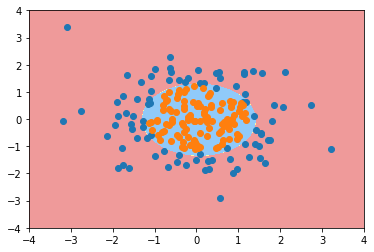

In [28]:
def plot_decision_boundary(model, axis):
    x0, x1 = np.meshgrid(
        np.linspace(axis[0], axis[1], int((axis[1] - axis[0]) * 100)),
        np.linspace(axis[2], axis[3], int((axis[3] - axis[2]) * 100))
    )
    
    X_new = np.c_[x0.ravel(), x1.ravel()]
    
    y_predict =model.predict(X_new)
    zz = y_predict.reshape(x0.shape)
    
    from matplotlib.colors import ListedColormap
    custom_cmap = ListedColormap(["#EF9A9A", "#FFF59D", "#90CAF9"])
    
    plt.contourf(x0, x1, zz, cmap = custom_cmap, linewidth = 5)

plot_decision_boundary(poly_log_reg, axis=[-4,4,-4,4])
plt.scatter(x[y==0, 0], x[y==0, 1])
plt.scatter(x[y==1, 0], x[y==1, 1])
plt.show()

# 总结：

* 1、逻辑回归与线性回归类似，可以添加多项式项，使得分类器变为多项式分类器
* 2、如果degree过大，仍然会发生过拟合现象